Notebook pour tester le code en C

In [1]:
from ctypes import *
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass
import math

Importation du DLL

In [2]:
path_to_dll = "C:/Users/Toky Cedric/Desktop/Etudes/Projet Annuel/CPPDLL_ForPython/cmake-build-debug/CPPDLL_ForPython.dll"
mylib = cdll.LoadLibrary(path_to_dll)

[-0.48116952  0.0790453 ]
[-1.2716224193572998, -1.1925771236419678, -1.1135318279266357, -1.0344865322113037, -0.9554412961006165, -0.8763960003852844, -0.7973507046699524, -0.7183054089546204, -0.6392601132392883, -0.5602148175239563, -0.48116952180862427, -0.40212422609329224, -0.3230789303779602, -0.24403363466262817, -0.16498833894729614, -0.08594304323196411, -0.00689774751663208, 0.07214754819869995, 0.15119284391403198, 0.230238139629364, 0.30928343534469604]


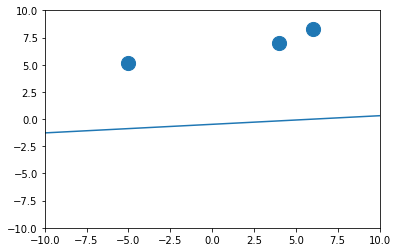

[6.4053397  0.25679615]
[3.8373782634735107, 4.094174385070801, 4.350970268249512, 4.607766628265381, 4.86456298828125, 5.121358871459961, 5.37815523147583, 5.634951114654541, 5.89174747467041, 6.148543357849121, 6.40533971786499, 6.662136077880859, 6.91893196105957, 7.1757283210754395, 7.43252420425415, 7.6893205642700195, 7.9461164474487305, 8.202913284301758, 8.459709167480469, 8.71650505065918, 8.97330093383789]
here


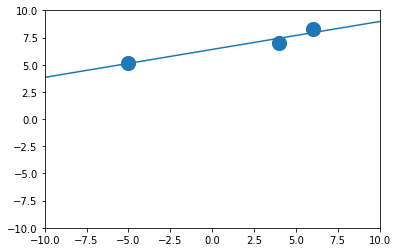

In [3]:
dataset_inputs = [
                [-5],
                [4],
                [6],
]

 

dataset_expected_outputs = [
                5.2,
                7.0,
                8.3
]

 

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

 

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(i)
    
#mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), c_int]
#mylib.predict_linear_model_regression.restype = c_float 

 

predicted_outputs = []

for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    predicted_outputs.append(tmp)


arrX = np.ctypeslib.as_array(model, (2,))
print(x)
print(predicted_outputs)
 


#np_arr = np.ctypelib.as_arr()
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

####

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))

test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
print(x)
print(result)
print("here")
plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)


# Utilisation du PMC pour de la classification

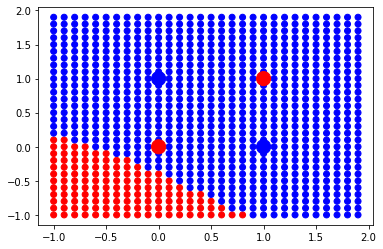

here1
here2


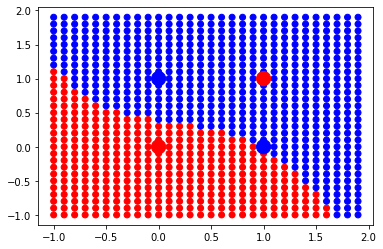

In [11]:
dataset_inputs = [
                [0, 0],
                [1, 1],
                [0, 1],
                [1, 0],
]

dataset_expected_outputs = [
                -1,
                -1,
                1,
                1,
]

init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]


mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

print("here1")
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.001, 100000)
print("here2")
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])